<a href="https://colab.research.google.com/github/sobieddch90/mcd_udg_tfm-egg_analysis/blob/main/Load%20Dataset%20in%20Google%20Drive%20%26%20Explore%20EEG%20(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Dataset and Explore EEG Files


- Author: Elmo Chavez
- Date: 15-Jun-2023


In [12]:
%%capture
!pip install openneuro-py
!pip install mne

In [13]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
import shutil

import openneuro as on
import mne

import matplotlib.pyplot as plt

# Download the Dataset

Downloading the dataset directly from the website using openneuro package.

**PD**: _running the download command may take several minutes to load and download all the datasets._


In [14]:
!mkdir /content/dataset
output_dir = "/content/dataset"

mkdir: cannot create directory ‘/content/dataset’: File exists


Downloading Dataset


In [15]:
dataset_id = "ds004504"
on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2023.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 357 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


## Store the Dataset in Google Drive

This will permit load the dataset from Google Drive for the following Notebooks and avoid download the dataset for each instance of Google Colab you'll run.


In [16]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
source_folder = '/content/dataset'
destination_folder = '/content/drive/MyDrive/EEG_Dataset/ds004504'

try:
  shutil.copytree(source_folder, destination_folder)
except:
  print('Files already downloaded')

Files already downloaded


# Read and Explore Files


## Read First File


Using Google Colab


In [18]:
path = '/content/drive/MyDrive/EEG_Dataset/ds004504/derivatives/sub-001/eeg/'

File #1 - Sub-001


In [19]:
filename = 'sub-001_task-eyesclosed_eeg.set'

raw = mne.io.read_raw_eeglab(path+filename, preload=True)
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

**Principal Information from Dataset**


In [20]:
print('Frequency: ', raw.info['sfreq'])
print('High pass:', raw.info['highpass'])
print('Low pass:', raw.info['lowpass'])
print('Max Time:', raw.tmax)
print('# Channels:',len(raw.ch_names))
raw.describe()

Frequency:  500.0
High pass: 0.0
Low pass: 250.0
Max Time: 599.798
# Channels: 19
<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -161.52     -21.98       0.20      22.28     143.65
 1  Fp2   EEG   µV      -137.61     -21.79       0.29      22.22     148.81
 2  F3    EEG   µV      -126.39     -21.31       0.34      21.33     140.30
 3  F4    EEG   µV      -126.99     -21.21       0.38      21.46     149.70
 4  C3    EEG   µV      -126.59     -21.16       0.51      21.34     139.82
 5  C4    EEG   µV      -128.02     -21.16       0.47      21.42     145.65
 6  P3    EEG   µV      -124.71     -21.44       0.43      21.53     143.70
 7  P4    EEG   µV      -126.30     -21.42       0.45      21.61     137.40
 8  O1    EEG   µV      -127.03     -21.79       0.57      21.54     146.38
 9  O2    EEG   µV      -128.01     -21.88       0.35      21.90  

### Plot EEG Data


**All Channels**


Using matplotlib as 2D backend.


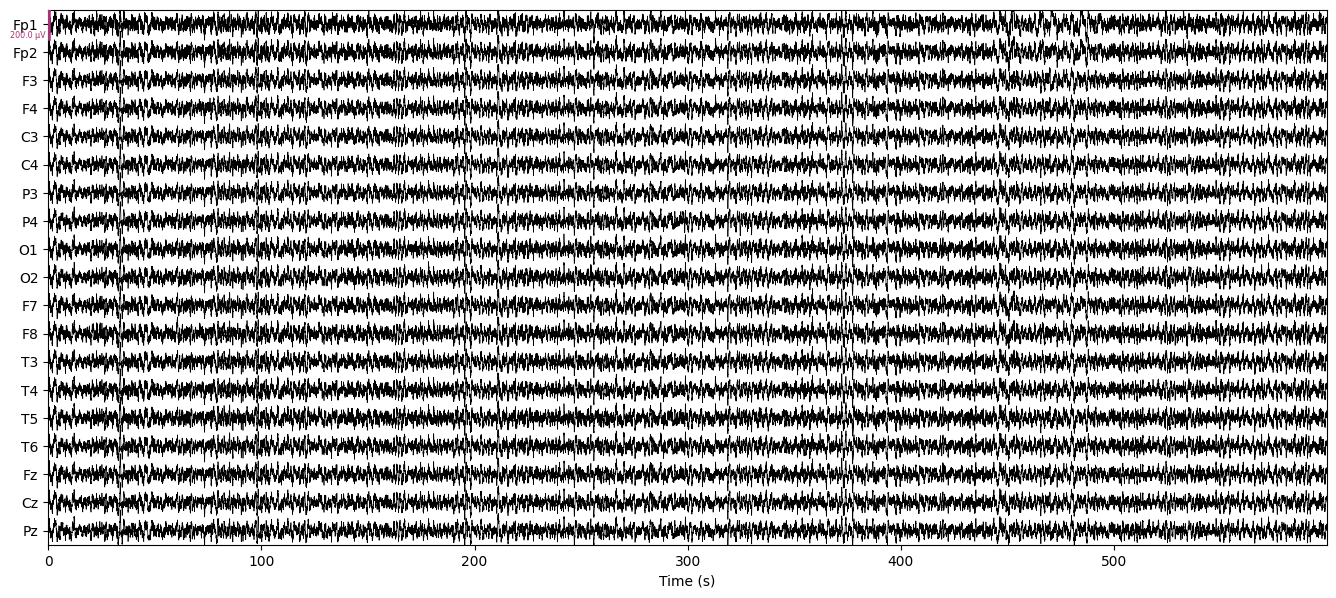

In [21]:
eeg_channels = mne.pick_types(raw.info, eeg=True, meg=False, stim=False, eog=False, exclude='bads')

fig = raw.plot(n_channels=len(eeg_channels), scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=600,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(14, 6)
plt.show()

**Only Channel FP1**


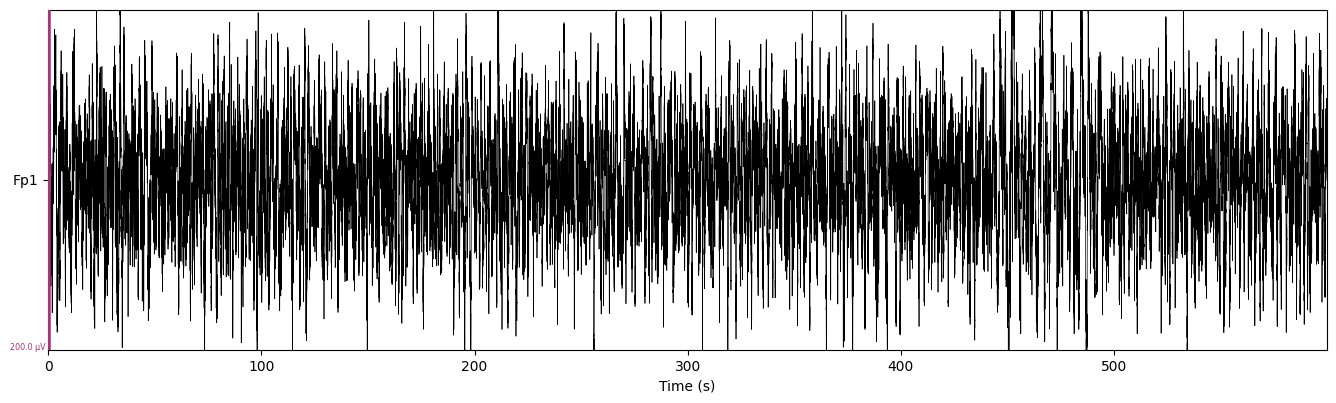

In [22]:
fig = raw.plot(n_channels=1, scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=600,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(14, 4)
plt.show()

**Only first 25 seconds from Channel FP1**


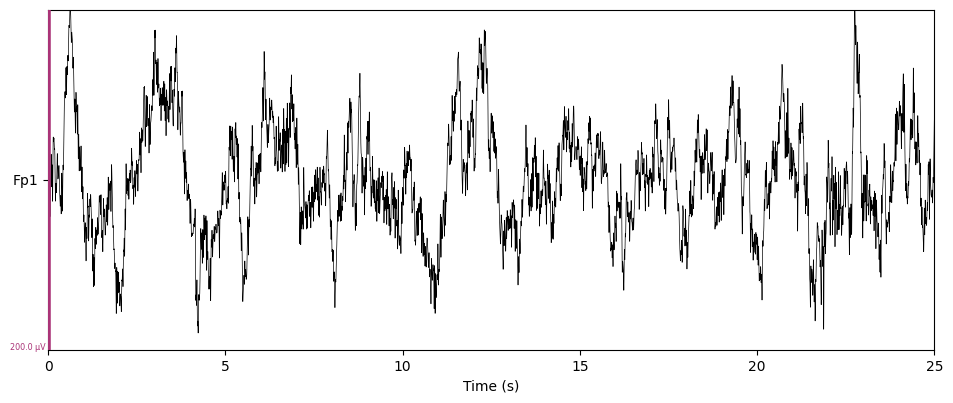

In [23]:
fig = raw.plot(n_channels=1, scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=25,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(10, 4)
plt.show()

**Only Raw Data vs Raw Data Filtered**


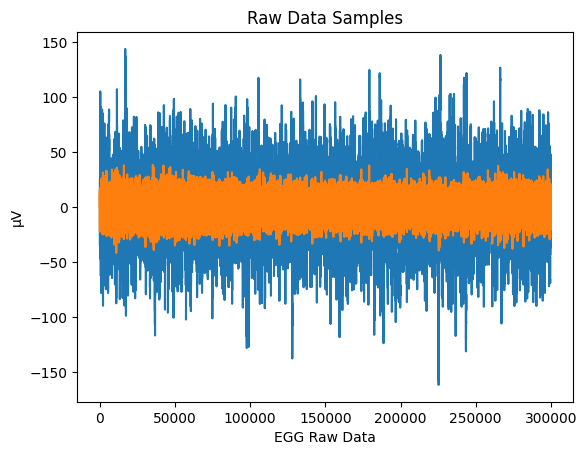

In [24]:
a = raw.copy().pick(['Fp1']).get_data()
eeg_data = np.transpose(a)

b = raw.copy().filter(5,45, verbose=False).pick(['Fp1']).get_data()
eeg_data_filtered = np.transpose(b)

plt.plot(eeg_data*1e6)
plt.plot(eeg_data_filtered*1e6)
plt.xlabel('EGG Raw Data')
plt.ylabel('µV')
plt.title('Raw Data Samples')
plt.show()

**Power Spectral Density**


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


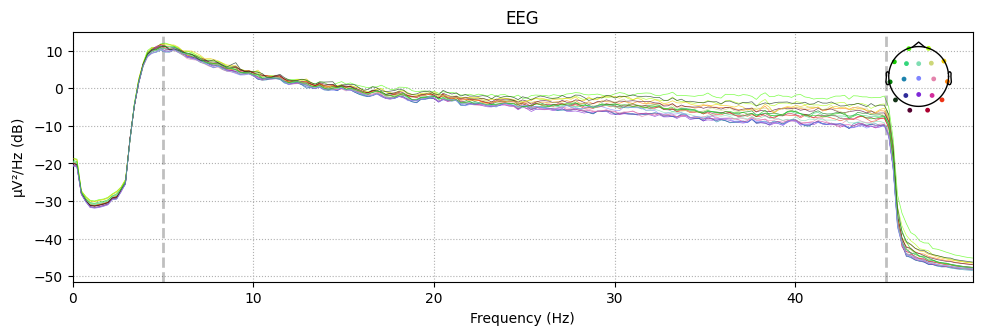

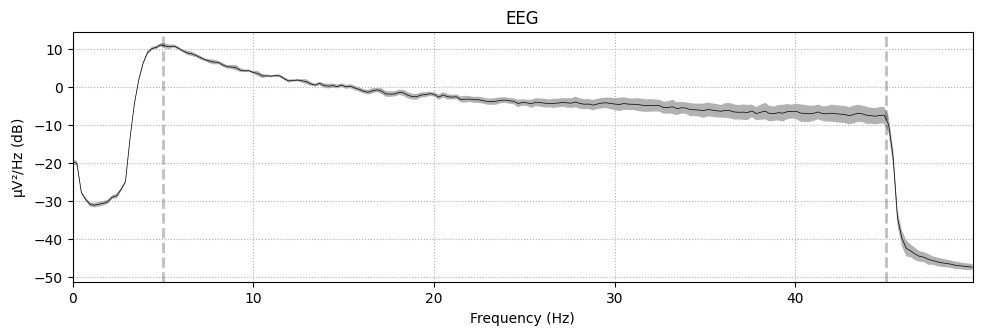

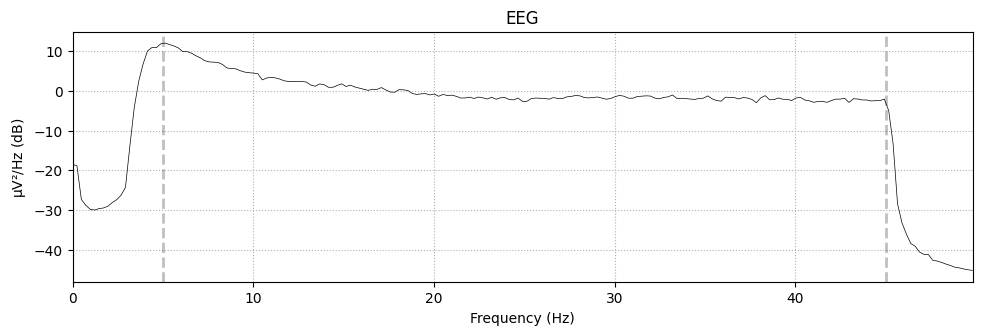

In [25]:
raw_filtered = raw.copy().filter(5,45, verbose=False)
fig1 = raw_filtered.compute_psd(fmax=50).plot(picks='data', exclude='bads')
fig2 = raw_filtered.compute_psd(fmax=50).plot(picks='data', exclude='bads',average=True)
fig3 = raw_filtered.compute_psd(fmax=50).plot(picks=['Fp1'], exclude='bads',average=True)

plt.show()